In [1]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument('headless')

options.add_argument('window-size=1920x1080')

# initialize the driver
driver = webdriver.Chrome(chrome_options=options)
driver.get("https://twitter.com/search?f=tweets&vertical=default&q=javascript") # Will do the complete initial loading
tweets = driver.find_elements_by_xpath("//li[@data-item-type='tweet']")

In [2]:
len(tweets)

13

In [3]:
# If we don't wait for new tweets to load we get the same amount
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
tweets = driver.find_elements_by_xpath("//li[@data-item-type='tweet']")
len(tweets)

13

In [4]:
# After a while we get new tweets
tweets = driver.find_elements_by_xpath("//li[@data-item-type='tweet']")
len(tweets)

29

In [5]:
from selenium.webdriver.support.ui import WebDriverWait

# Our until condition
def new_posts(driver, min_len):
    return len(driver.find_elements_by_xpath("//li[@data-item-type='tweet']")) > min_len

driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

# WebDriverWait().until parameter is a function that takes the driver as an argument and returns
# True when has waited enough. Also look into Expected Conditions
WebDriverWait(driver, 10).until(lambda driver: new_posts(driver, len(tweets)))
tweets = driver.find_elements_by_xpath("//li[@data-item-type='tweet']")
len(tweets)

45

In [6]:
while len(tweets) < 200:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    WebDriverWait(driver, 10).until(lambda driver: new_posts(driver, len(tweets)))

    tweets = driver.find_elements_by_xpath("//li[@data-item-type='tweet']")
    
len(tweets)

211

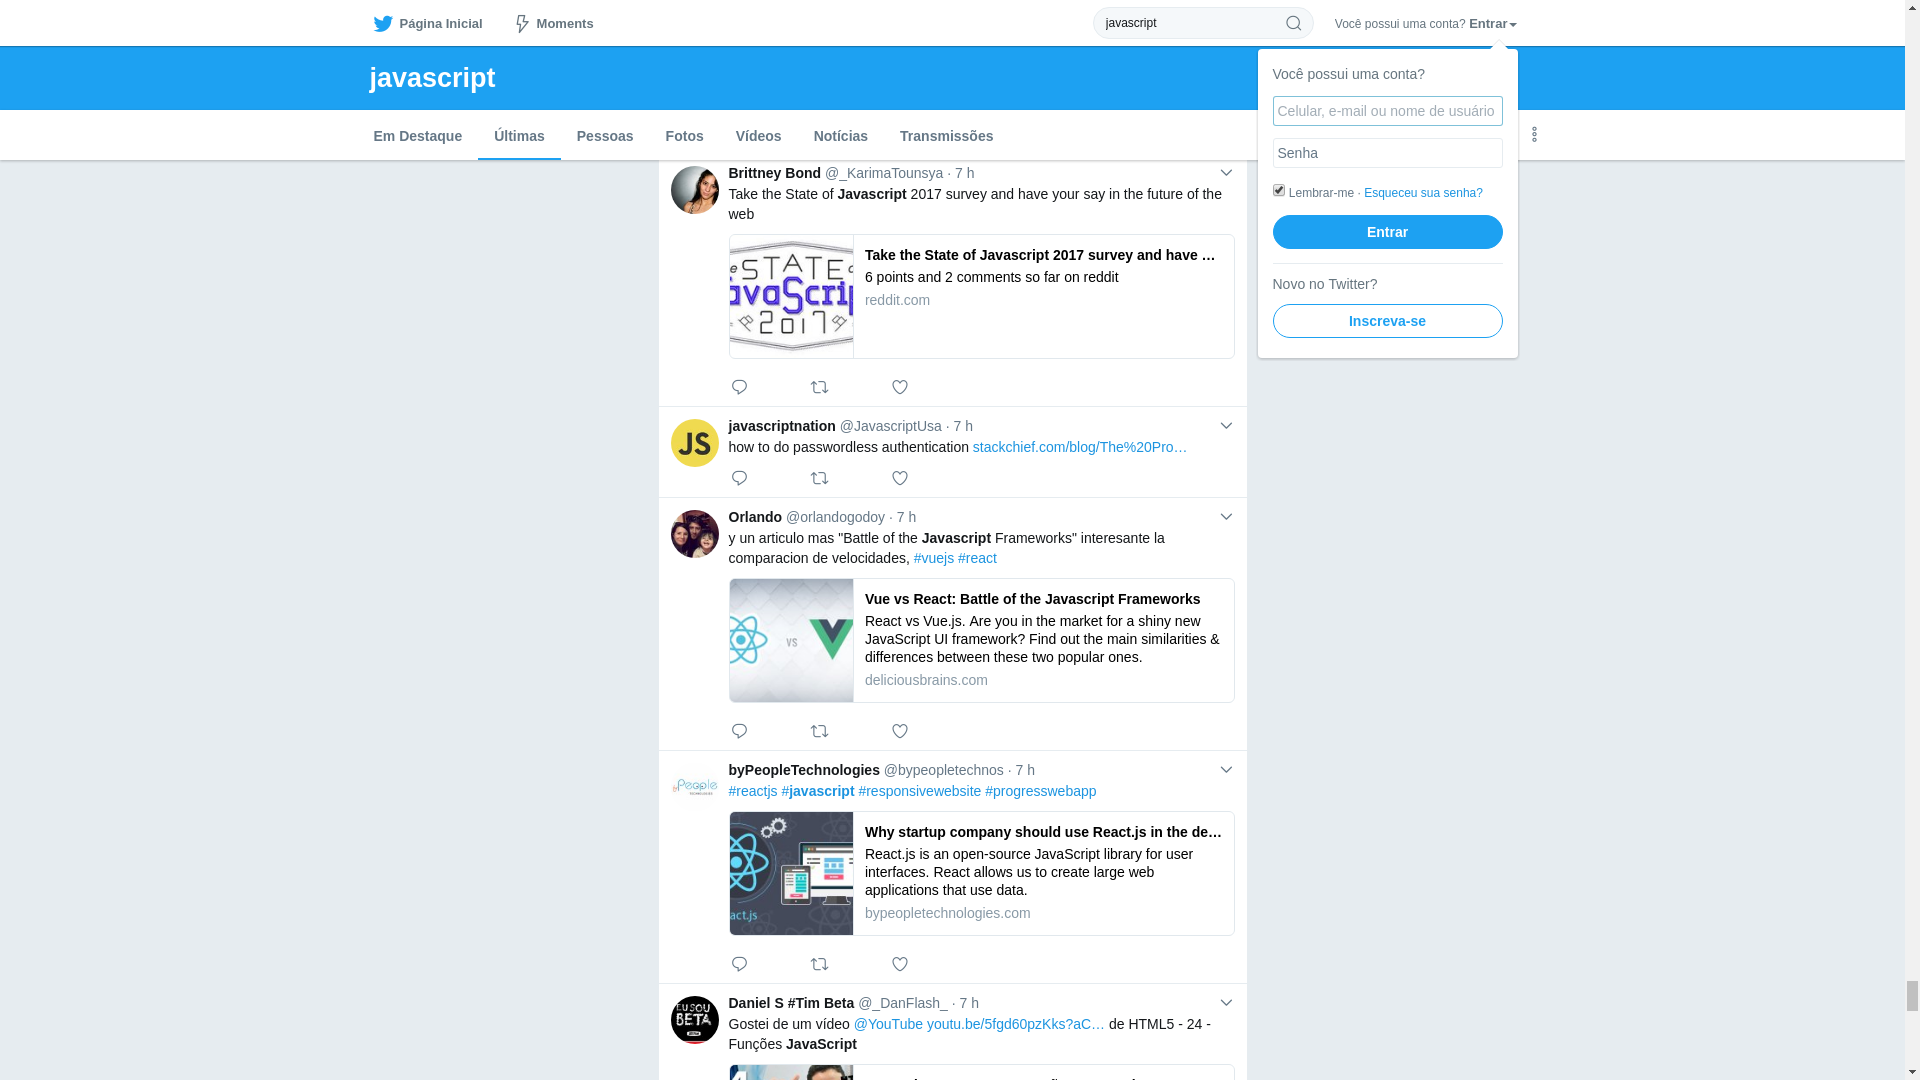

In [7]:
# Let's take a screenshot of the current screen
from IPython.display import Image

driver.save_screenshot("current.png")

Image("current.png")

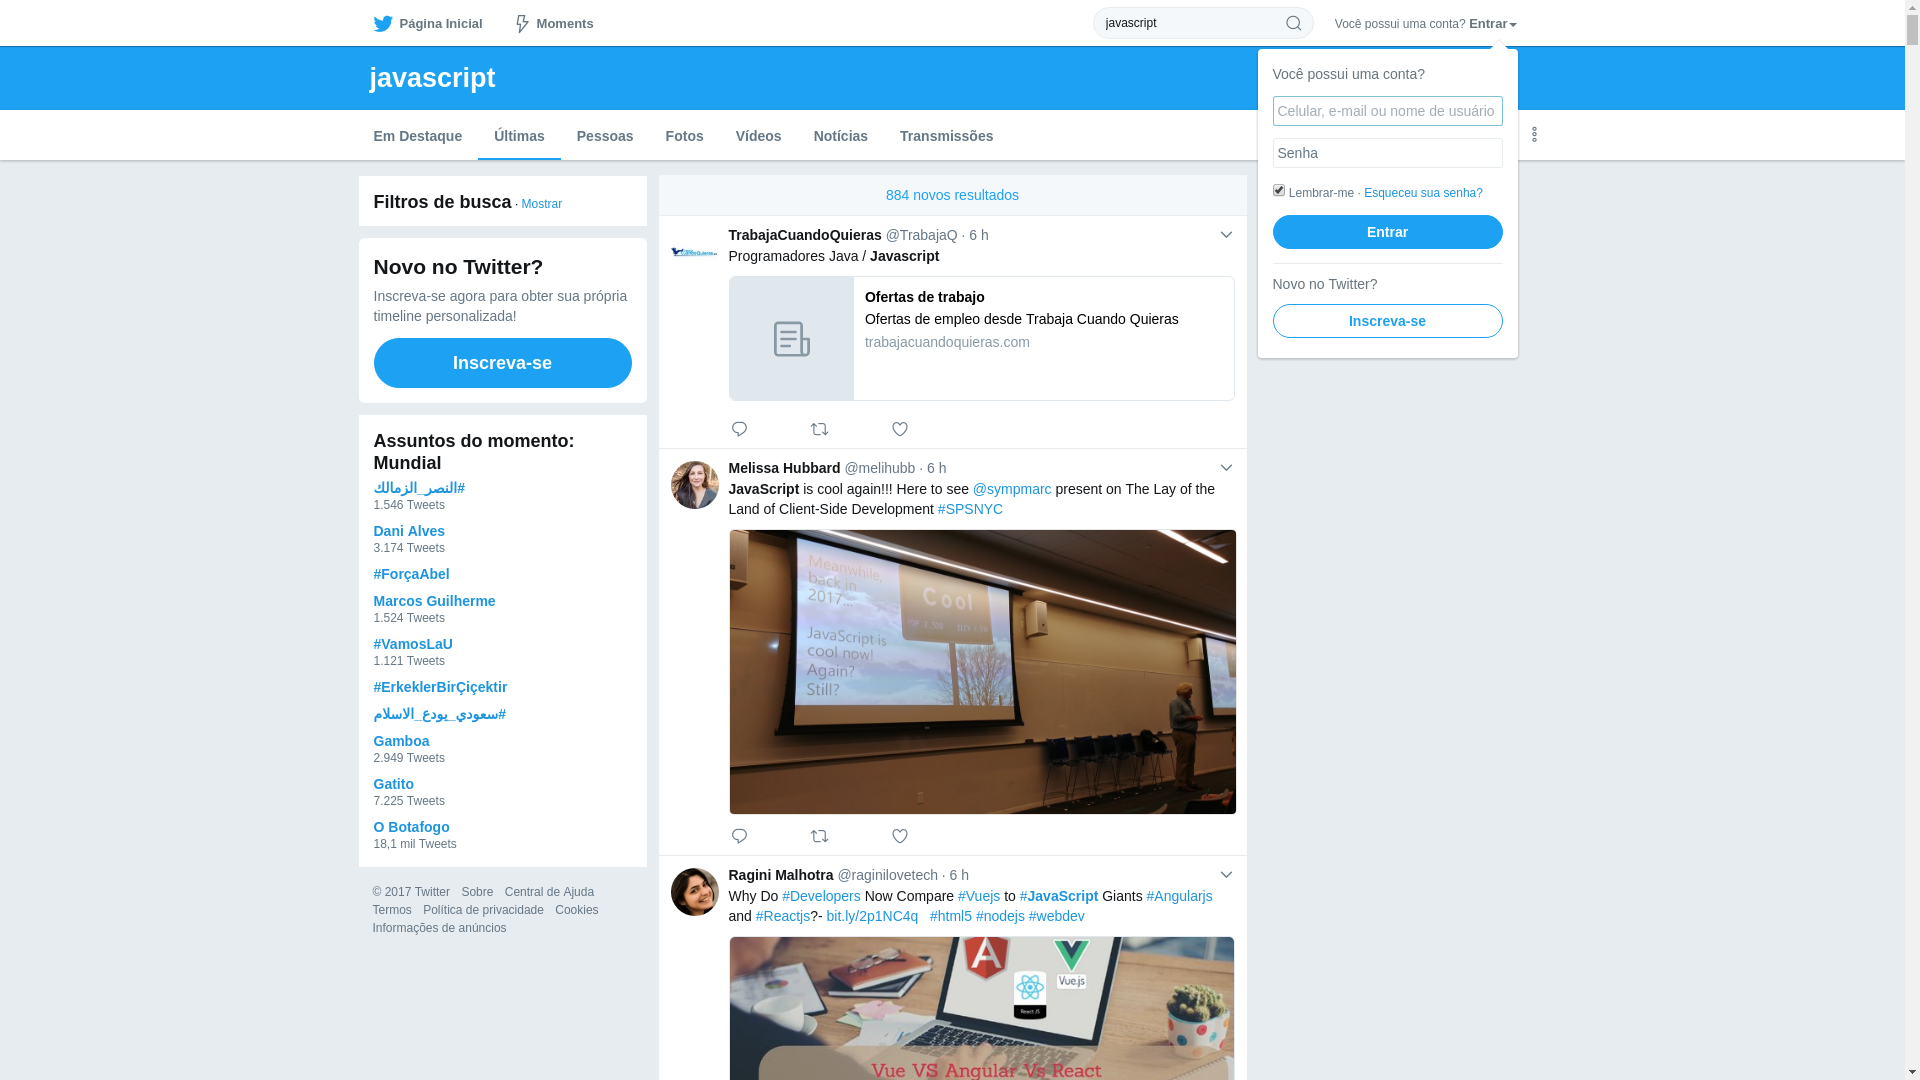

In [8]:
# That's nice, but I actually want the screenshot at the top
driver.execute_script("window.scrollTo(0, 0);")
driver.save_screenshot("top.png")

Image("top.png")

In [14]:
# Now to extract the info on the tweets, we might use lxml or selenium itself, but using lxml will 
# be incredibly faster
import lxml.html as parser

html = parser.fromstring(driver.page_source)

tweets_lxml = html.xpath("//li[@data-item-type='tweet']")

tweet = tweets_lxml[0]
fullname = tweet.xpath(".//*[contains(@class, 'fullname')]/text()")[0]
username = "".join(tweet.xpath(".//*[contains(@class, 'username')]/descendant-or-self::*/text()"))
t = "".join(tweet.xpath(".//*[contains(@class, 'js-tweet-text-container')]/descendant-or-self::*"
                                "[not(self::*[contains(@class, 'tco-ellipsis')])]/text()")).strip()
extracted_tweet = {"fullname": fullname, "username": username, "tweet": t}

In [16]:
extracted_tweet

{'fullname': 'TrabajaCuandoQuieras',
 'tweet': 'Programadores Java /\xa0Javascript http://trabajacuandoquieras.com/job/programadores-java-javascript-2/',
 'username': '@TrabajaQ'}